In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Naive Bayes
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

%matplotlib inline

In [88]:
# Loading data
test = pd.read_csv('SalaryData_Test.csv',encoding= 'unicode_escape')
train = pd.read_csv('SalaryData_Train.csv',encoding= 'unicode_escape')

# EDA and DATA PREPROCESSING

In [89]:
train.shape 

(30161, 14)

In [90]:
test.shape

(15060, 14)

In [91]:
#checkng null value for train dataset.
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [92]:
#chechkong null value for test dataset.
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [93]:
train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [94]:
test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [95]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [96]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [97]:
#Here we will find the Frequency for Categorical columns in train dataset
category_col =['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary'] 
for c in category_col:
    print(c)
    print(train[c].value_counts())
    print('/n')

workclass
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
/n
education
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
/n
maritalstatus
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
/n
occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-c

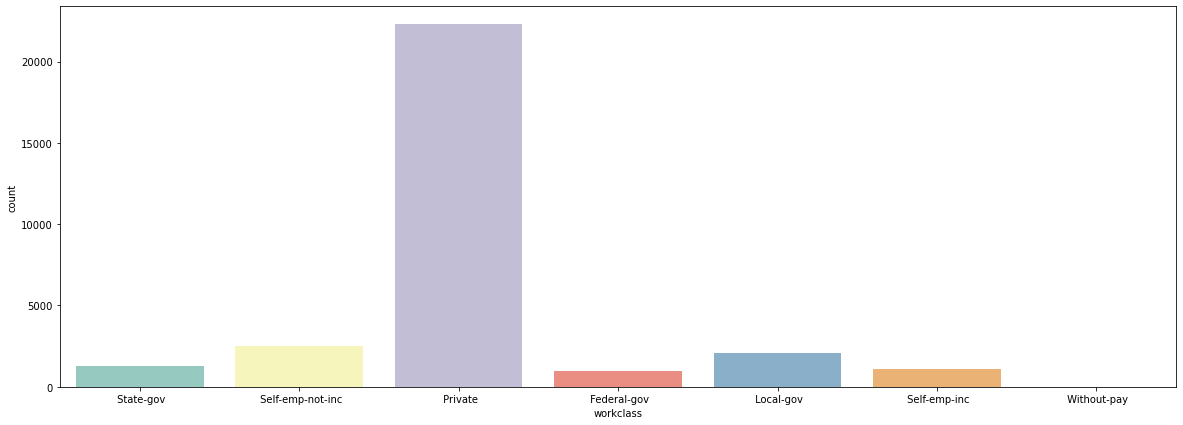

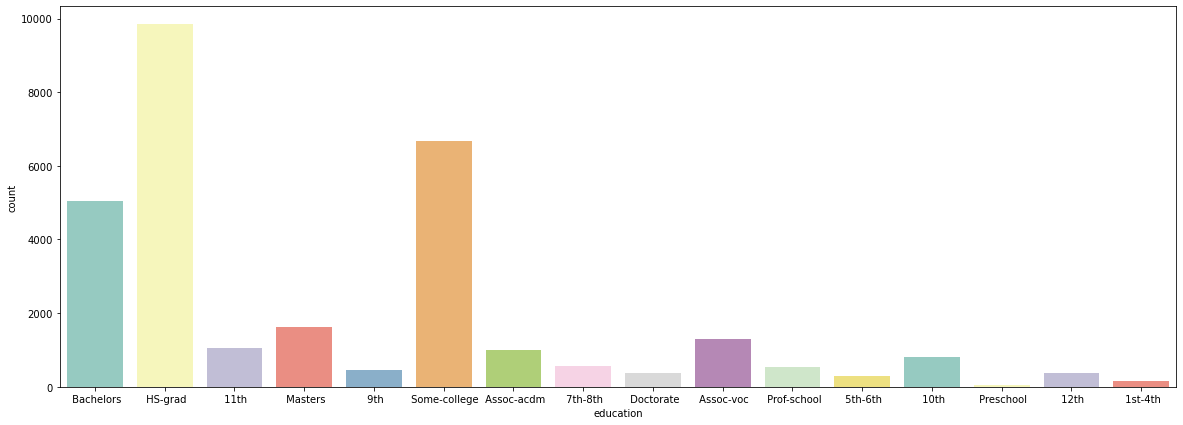

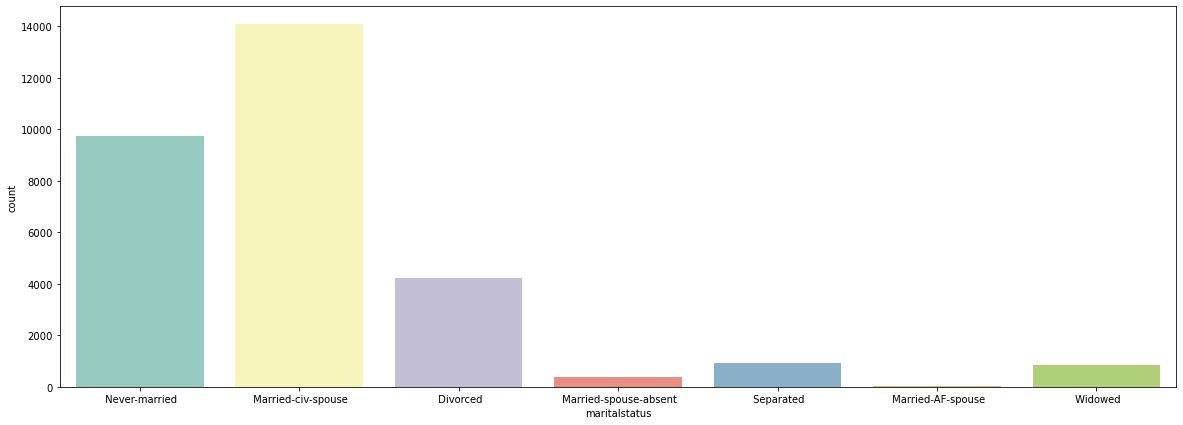

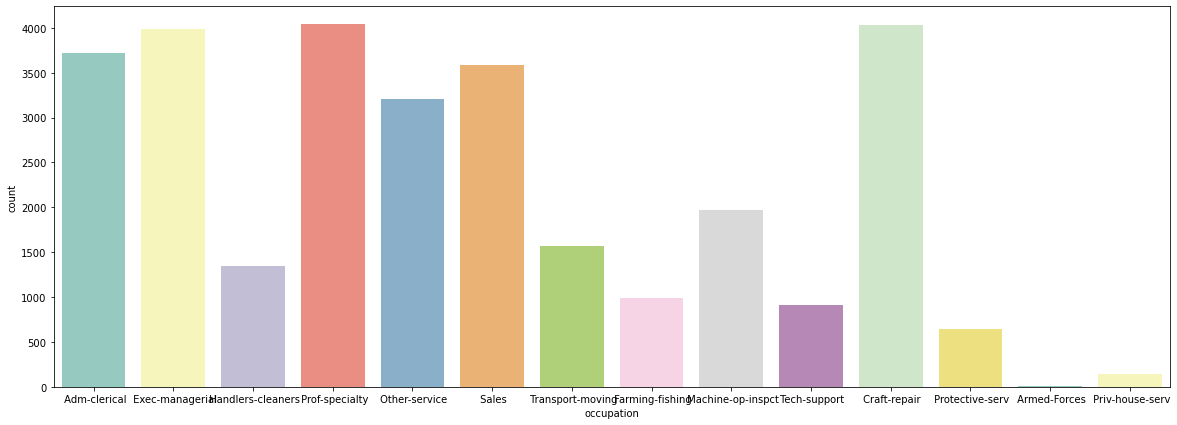

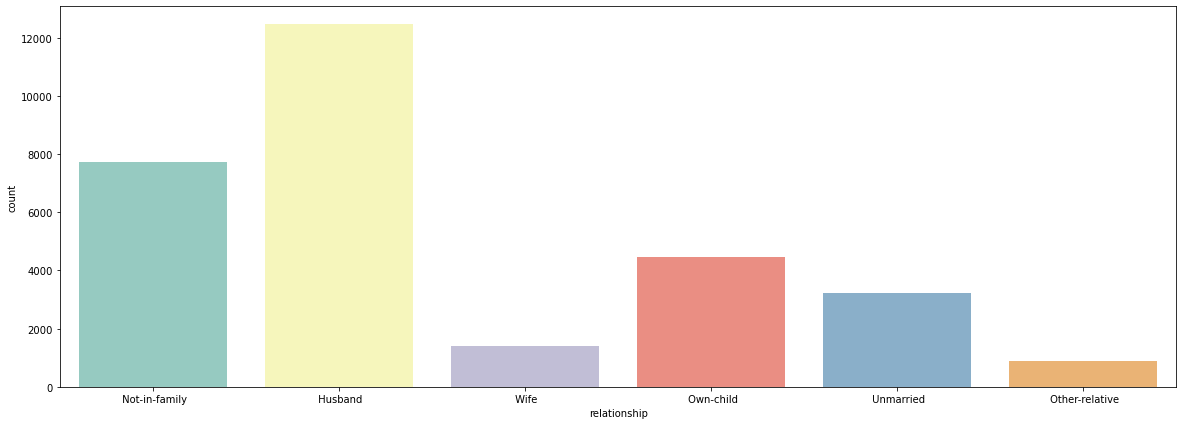

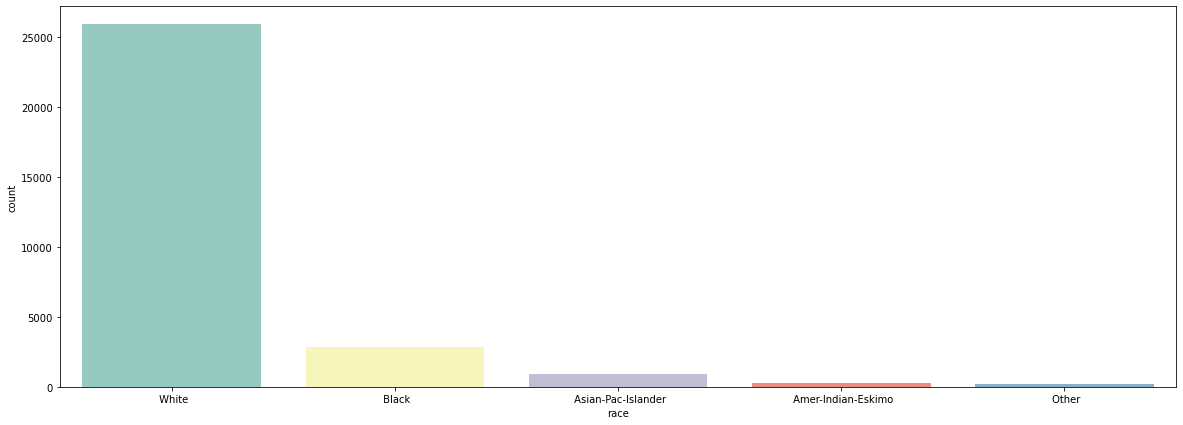

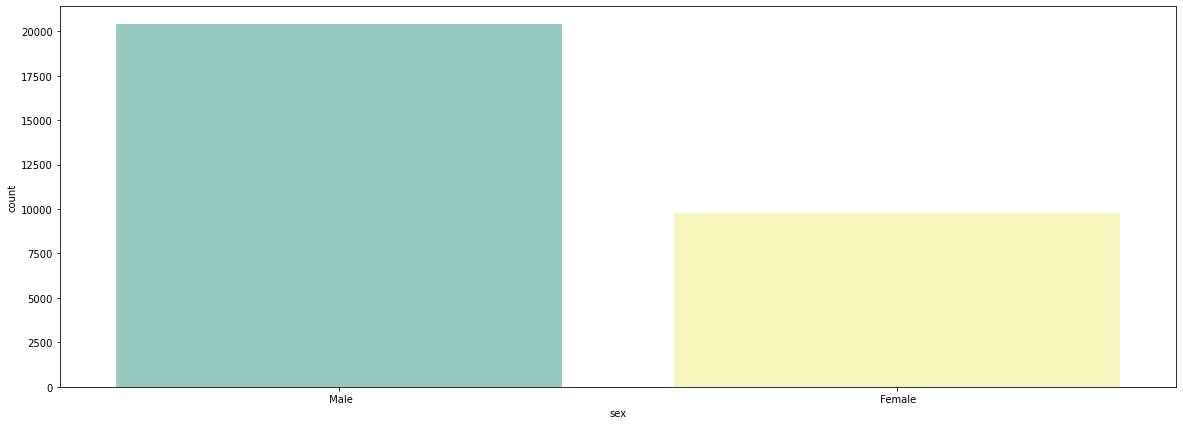

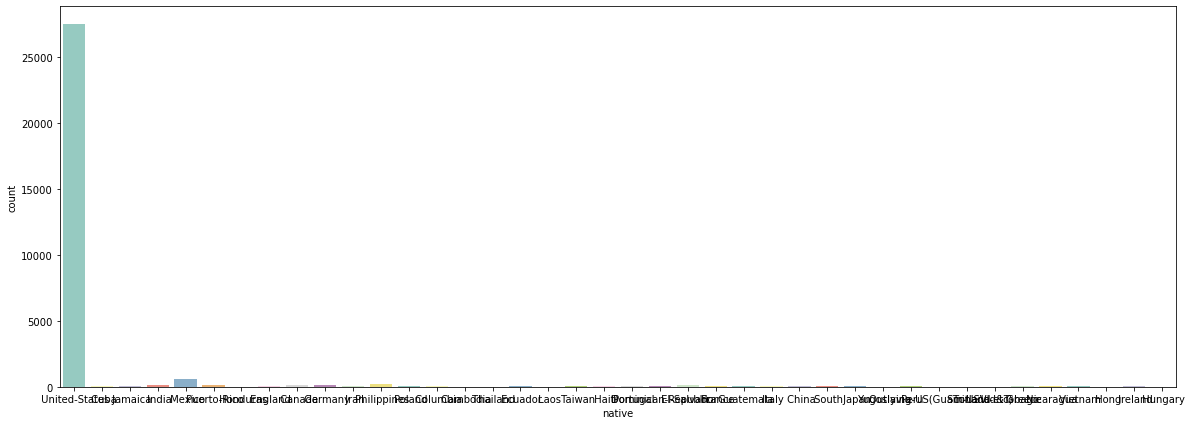

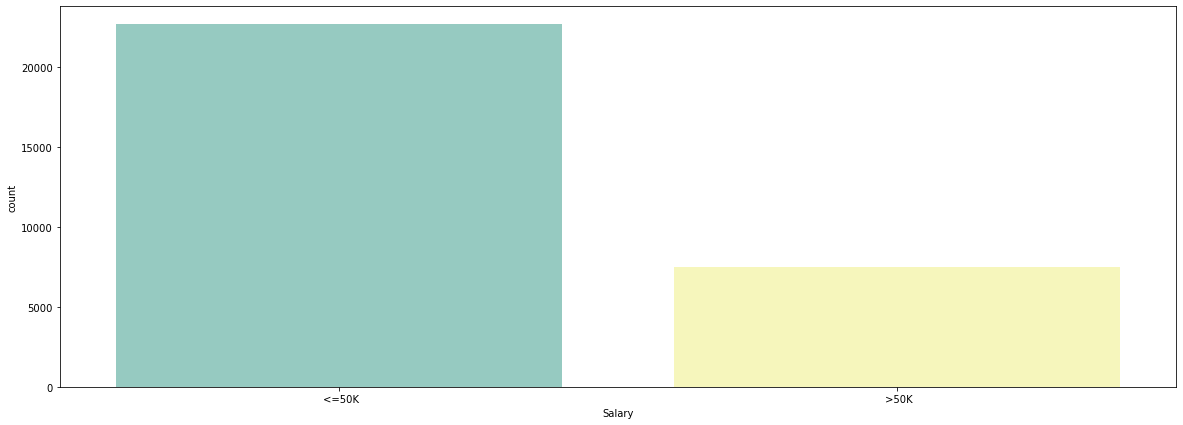

In [98]:
#Ploting count plot for each categorical columns
import seaborn as sns
cat_col =['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary'] 
for col in cat_col:
    plt.figure(figsize=(20,7))
    sns.countplot(x=col,data=train,palette='Set3')
    


# Here we will use One Hot Encoding

### For converting non_numeric form into numeric form 

In [99]:
#here we will use get_dummies for encoding 
#Encoding train Dataset
train2=train.iloc[:,0:13]
train2=pd.get_dummies(train2)
train2

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [100]:
#here we will use get_dummies for encoding 
#Encoding test Dataset
test2=test.iloc[:,0:13]
test2=pd.get_dummies(test2)
test2

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15056,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15057,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15058,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [101]:
#Here we will do concatination of Salary column and train2 dataaset
finaltrain=pd.concat([train2,train['Salary']],axis=1)
finaltrain

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,<=50K
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,>50K
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
30159,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K


In [102]:
#Here we will do concatination of Salary column and test2 dataaset
finaltest=pd.concat([test2,test['Salary']],axis=1)
finaltest

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,>50K
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,>50K
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
15056,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
15057,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
15058,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K


# Dividing FinalTrain dataset and FinalTest dataset 

In [115]:
#FOR FINALTRAIN DATASET
X_train=finaltrain.values[:,0:102]
Y_train=finaltrain.values[:,102]

In [116]:
#FOR FINALTEST DATASET 
X_test=finaltest.values[:,0:102]
Y_test=finaltest.values[:,102]

# NAIVE BAYES MODEL

## MULTINOMIAL NAIVE BAYES 

In [117]:
#Model Train
from sklearn.naive_bayes import MultinomialNB as MB
# Multinomial Naive Bayes

# Model Train
classifier_mb = MB()

classifier_mb.fit(X_train, Y_train)

# Model Test

# Model Accuracy on train set
train_pred_m = classifier_mb.predict(X_train)
accuracy_train_m = np.mean(train_pred_m==Y_train) 

# Model Accuracy on test set
test_pred_m = classifier_mb.predict(X_test)
accuracy_test_m = np.mean(test_pred_m==Y_test) 

In [118]:
accuracy_train

0.7729186698053778

In [119]:
accuracy_test

0.7749667994687915

### Accuracy for Train as well Test data is almost equal for Multinomial Naive Bayes


# Applying Naive Bayes(Gaussian) for classification


In [120]:
from sklearn.naive_bayes import GaussianNB as GB
# Gaussian Naive Bayes

# Model Train
classifier_gb = GB()

classifier_gb.fit(X_train, Y_train)

# Model Test

# Model Accuracy on train set
train_pred_g = classifier_gb.predict(X_train)
accuracy_train_g = np.mean(train_pred_m==Y_train) 

# Model Accuracy on test set
test_pred_g = classifier_gb.predict(X_test)
accuracy_test_g = np.mean(test_pred_m==Y_test) 

In [121]:
accuracy_train_g


0.7729186698053778

In [122]:
accuracy_test_g

0.7749667994687915

## Accuracy for Train as well Test data is almost equal for Gaussian Naive Bayes


# Applying Naive Bayes(Bernoulli) for classification


In [123]:
from sklearn.naive_bayes import BernoulliNB as B
# Gaussian Naive Bayes

# Model Train
classifier_b = B()

classifier_b.fit(X_train, Y_train)

# Model Test

# Model Accuracy on train set
train_pred_b = classifier_b.predict(X_train)
accuracy_train_b = np.mean(train_pred_b==Y_train) 

# Model Accuracy on test set
test_pred_b = classifier_b.predict(X_test)
accuracy_test_b = np.mean(test_pred_b==Y_test) 

In [124]:
accuracy_train_b

0.7555120851430656

In [125]:
accuracy_test_b

0.7598273572377158

### Accuracy for Train as well Test data is almost equal for Bernoulli Naive Bayes but less than the previous 2 Algos i.e Multinomial naive Bayes and Gussain Bayes 


# Applying Naive Bayes(Categorical) for classification


In [126]:
from sklearn.naive_bayes import CategoricalNB as C
# Gaussian Naive Bayes

# Model Train
classifier_c = C()

classifier_c.fit(X_train, Y_train)

# Model Test

# Model Accuracy on train set
train_pred_c = classifier_c.predict(X_train)
accuracy_train_c = np.mean(train_pred_c==Y_train) 

# Model Accuracy on test set
test_pred_c = classifier_c.predict(X_test)
accuracy_test_c = np.mean(test_pred_c==Y_test) 

In [127]:
accuracy_train_c

0.8308743078810384

In [128]:
accuracy_test_c

0.8297476759628154

### Accuracy for Train as well Test data is almost equal for Categorical Naive Bayes


# Accuracy for Train as well Test data is almost equal for Categorical Naive Bayes
